# **Mushroom_Classification**

**Dataset :**

The dataset used in this project is mushrooms.csv that contains 8124 instances of mushrooms with 23 features like cap-shape, cap-surface, cap-color, bruises, odor, etc.



**Problem statement:**
    
   Classify the mushroom as edible or poisonous 
    
**Objective:**
    
    Detect if the mushroom is edible or poisonous by its specifications like cap shape, cap color, gill color, etc. using different classifiers.
    
    

# Import required libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

# Examining the Data

In [2]:
# Load csv file
df = pd.read_csv("mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
## check rows and columns of the dataset
df.shape

(8124, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [6]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [7]:
print("Dataset shape:", df.shape)

Dataset shape: (8124, 23)


In [8]:
df['class'].unique()

array(['p', 'e'], dtype=object)

# Visualization of unique values in Target variable

In [9]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

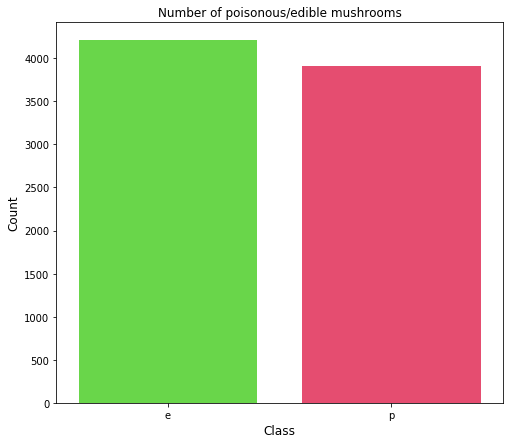

In [10]:
count = df['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
#plt.savefig("mushrooms1.png", format='png', dpi=500)
plt.show()

In [11]:
df = df.astype('category')
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [12]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [13]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [14]:
df['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int32

In [15]:
df = df.drop(["veil-type"],axis=1)

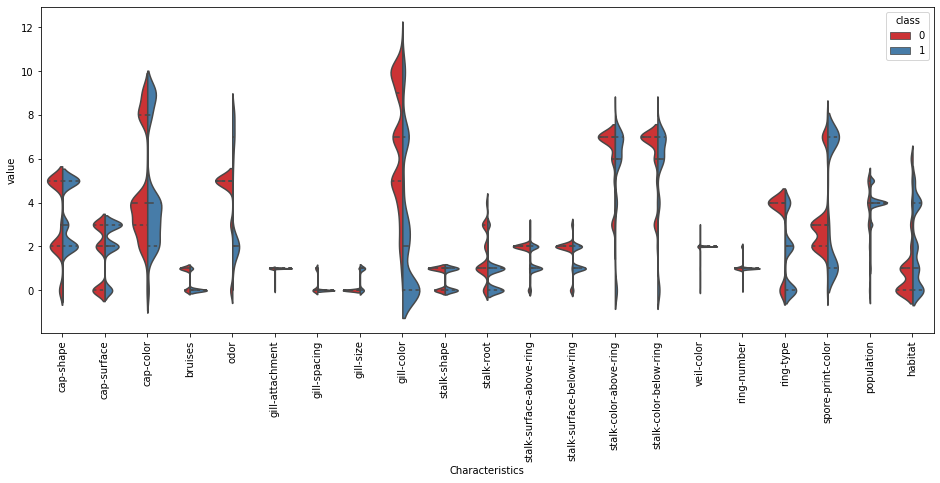

In [16]:
df_div = pd.melt(df, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(16,6))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));
#plt.savefig(“violinplot.png”, format=’png’, dpi=500, bbox_inches=’tight’)

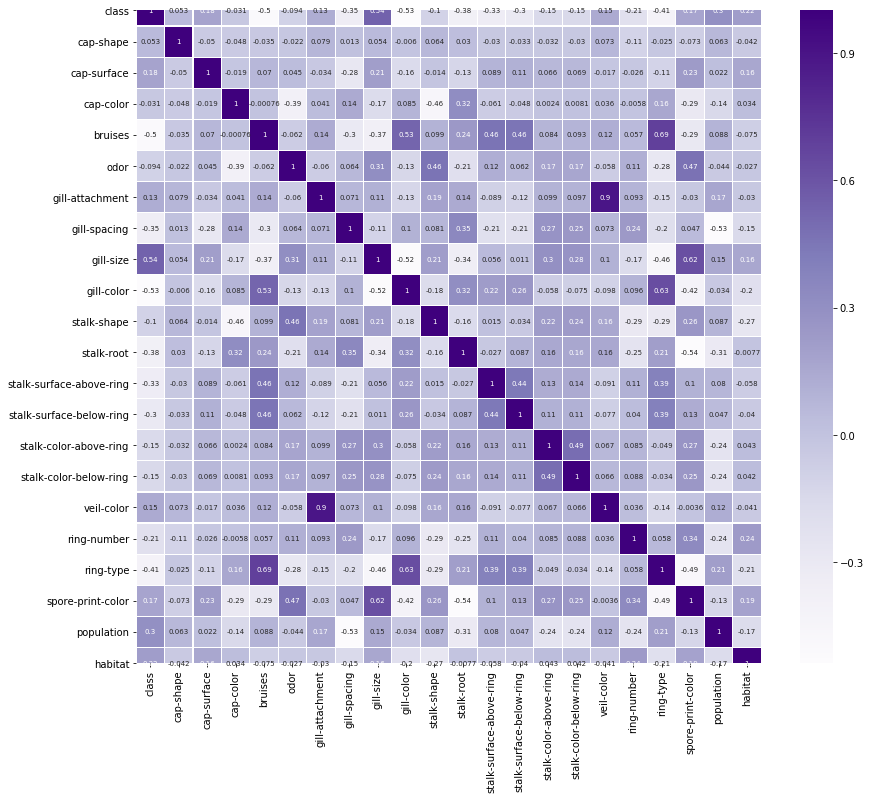

In [17]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);
#plt.savefig("corr.png", format='png', dpi=400, bbox_inches='tight')

In [18]:
df[['class', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


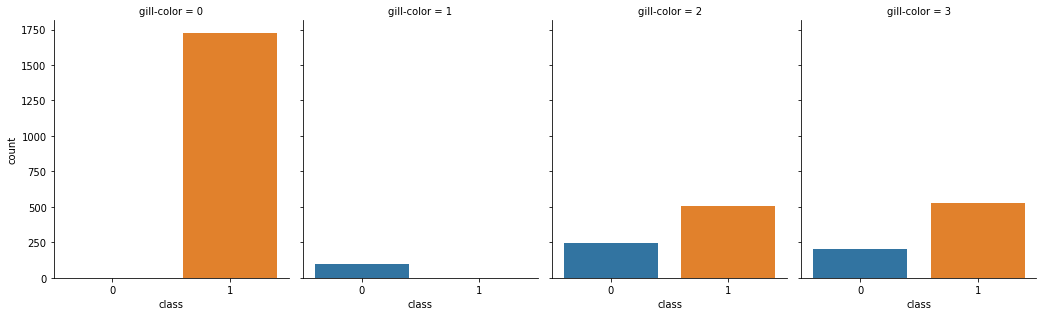

In [19]:
new_var = df[['class', 'gill-color']]
new_var = new_var[new_var['gill-color']<=3.5]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);
#plt.savefig("gillcolor1.png", format='png', dpi=500, bbox_inches='tight')

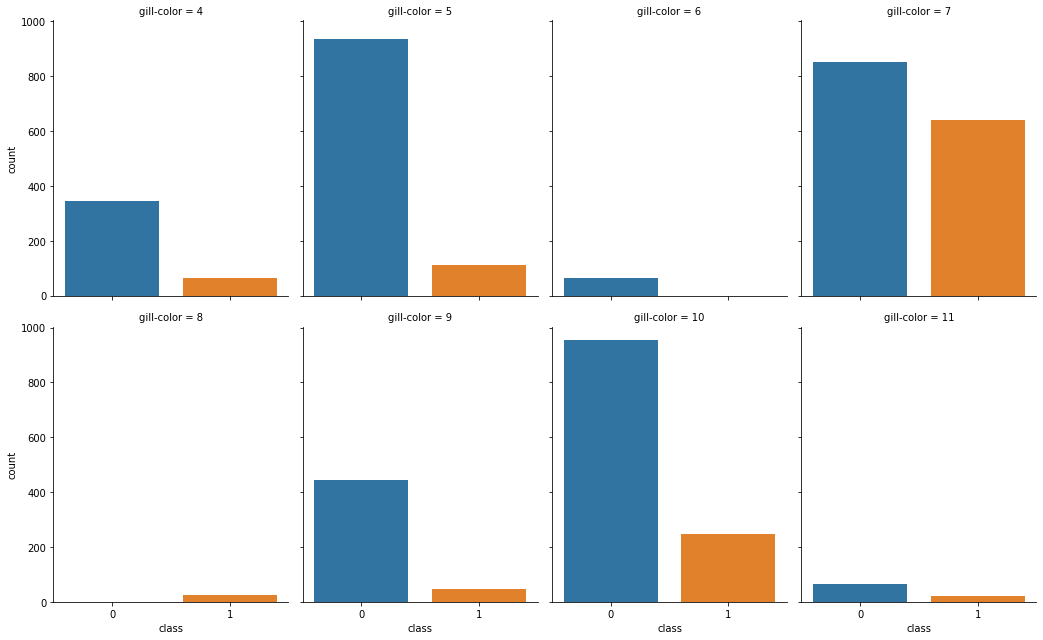

In [20]:
new_var=df[['class', 'gill-color']]
new_var=new_var[new_var['gill-color']>3.5]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);
#plt.savefig("gillcolor2.png", format='png', dpi=400, bbox_inches='tight')

In [21]:
X = df.drop(["class"], axis=1)
y = df["class"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [23]:
#1. Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

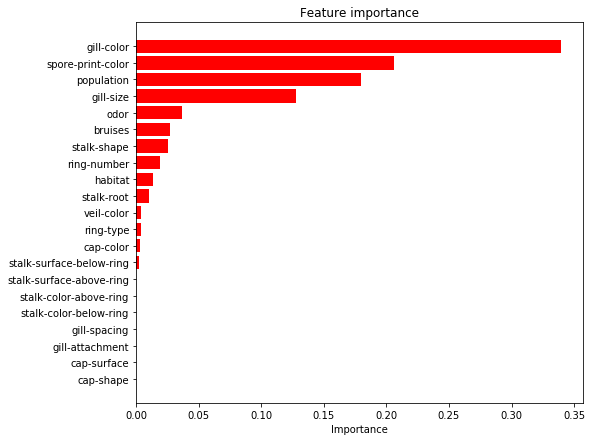

In [24]:
features_list = X.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
#plt.savefig("featureimp.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [25]:
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Test Accuracy: 100.0%


In [35]:
#Confusion Matrix for Decision Tree Classifier
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred_dt)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()


ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [33]:
#2. Logistic Regression Classification
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

Test Accuracy: 94.96%


In [ ]:
#Classification report of Logistic Regression Classifier
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

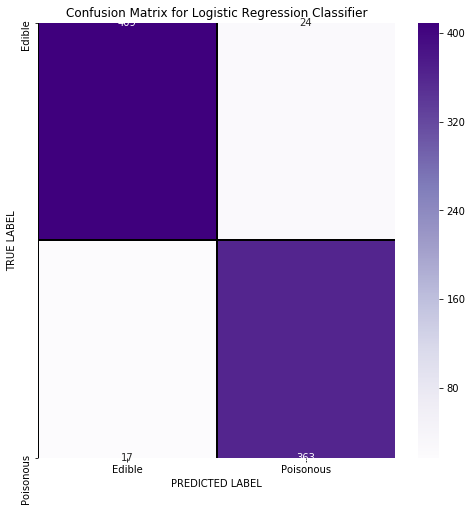

In [53]:
#Confusion Matrix for Logistic Regression Classifier
cm = confusion_matrix(y_test, y_pred_lr)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(8,8))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
#plt.savefig("lrcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [55]:
#3. KNN Classification
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    if knn.score(X_test, y_test) > best_score:
        best_score = knn.score(X_train, y_train)
        best_Kvalue = i
        
print("Best KNN Value: {}".format(best_Kvalue))
print("Test Accuracy: {}%".format(round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy: 100.0%


In [56]:
y_pred_knn = knn.predict(X_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))

KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       433
           1       0.99      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



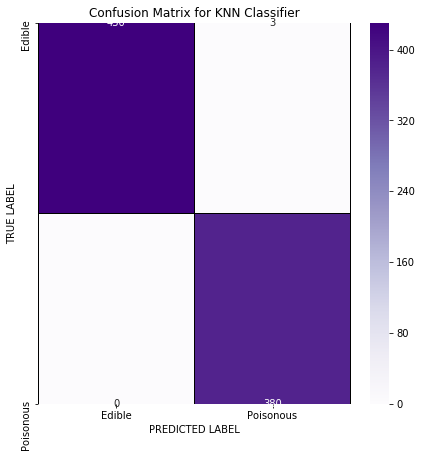

In [57]:
cm = confusion_matrix(y_test, y_pred_knn)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
#plt.savefig("knncm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [58]:
#4. SVM Classification
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto")
svm.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(svm.score(X_test, y_test)*100, 2)))

Test Accuracy: 100.0%


In [ ]:
y_pred_svm = svm.predict(X_test)
print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_svm))

In [ ]:
#Confusion Matrix for SVM Classifier
cm = confusion_matrix(y_test, y_pred_svm)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Classifier')
#plt.savefig("svmcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [ ]:
#5. Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(nb.score(X_test, y_test)*100, 2)))

In [ ]:
#Classification report of Naive Bayes Classifier
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_nb))

In [ ]:
#Confusion Matrix for Naive Bayes Classifier
cm = confusion_matrix(y_test, y_pred_nb)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
#plt.savefig("nbcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [ ]:
#6. Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))

In [ ]:
#Classification report of Random Forest Classifier
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))

In [ ]:
#Confusion Matrix for Random Forest Classifier
cm = confusion_matrix(y_test, y_pred_rf)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier');
#plt.savefig("rfcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

**#Predictions**

Predicting some of the X_test results and matching it with true i.e. y_test values using Decision Tree Classifier.


In [ ]:
preds = dt.predict(X_test)
print(preds[:36])
print(y_test[:36].values)
# 0 - Edible
# 1 - Poisonous